Incompleto dalla centralità in poi

ESTRAGGO I DATI
{'Abkhazia': 382.0, 'Afghanistan': 5529.0, 'Albania': 720.0, 'Algeria': 6470.0, 'Andorra': 120.0, 'Angola': 5198.0, 'Antigua and Barbuda': 0.0, 'Argentina': 9665.0, 'Armenia': 1254.0, 'Australia': 0.0, 'Austria': 2562.0, 'Azerbaijan': 2013.0, 'Bahamas': 0.0, 'Bahrain': 0.0, 'Bangladesh': 4246.0, 'Barbados': 0.0, 'Belarus': 2900.0, 'Belgium': 1385.0, 'Belize': 516.0, 'Benin': 1989.0, 'Bhutan': 1075.0, 'Bolivia': 6743.0, 'Bosnia and Herzegovina': 1459.0, 'Botswana': 4015.0, 'Brazil': 14691.0, 'Brunei': 381.0, 'Bulgaria': 1808.0, 'Burkina Faso': 3193.0, 'Burundi': 974.0, 'Cambodia': 2572.0, 'Cameroon': 4591.0, 'Canada': 8894.0, 'Cape Verde': 0.0, 'Central African Republic': 5213.0, 'Chad': 5968.0, 'Chile': 6171.0, "People's Republic of China": 22147.0, 'Colombia': 6004.0, 'Comoros': 0.0, 'Democratic Republic of the Congo': 10730.0, 'Republic of the Congo': 5504.0, 'Costa Rica': 639.0, "Côte d'Ivoire": 3110.0, 'Croatia': 2197.0, 'Cuba': 0.0, 'Cyprus': 152.0, 'Czech Republic

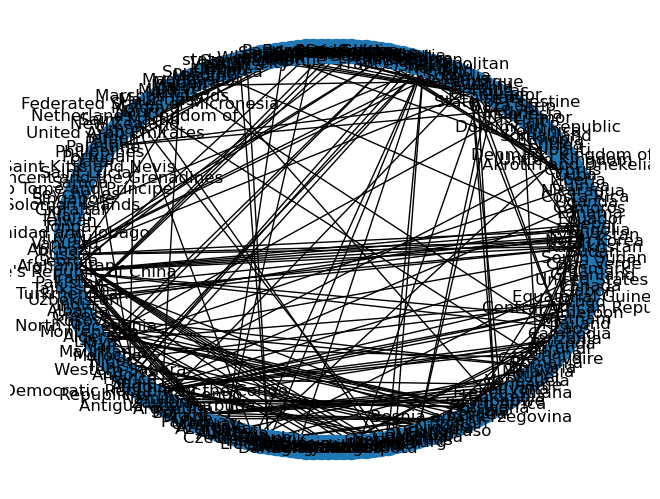



ANALISI DEL GRAFO

Analisi del grafo dei confini territoriali

Numero dei nodi :  221
Numero degli archi :  365
Grado medio dei nodi :  1.6515837104072397
Numero di componenti fortemente connessi :  41
Numero di componenti debolmente connessi :  41
Grafico istogramma


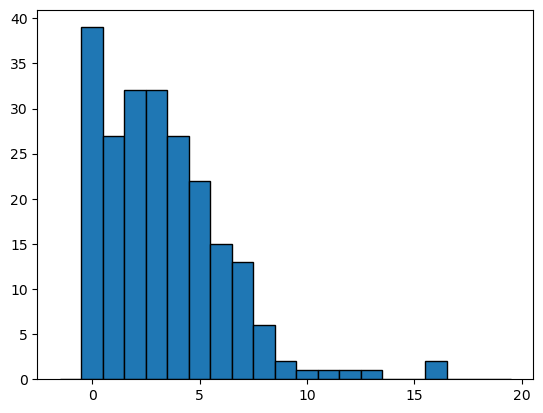

Componenti connesse
Componente  1  ->  {'Portugal', 'Honduras', 'Macau', 'India', 'Netherlands, Kingdom of', 'Colombia', 'Vatican City', 'Azerbaijan', 'France, Metropolitan', 'Norway', 'Kuwait', 'Indonesia', 'Gabon', 'Benin', 'Djibouti', 'Republic of the Congo', 'Saint Martin', 'Thailand', 'Papua New Guinea', 'Burkina Faso', 'Bhutan', 'Myanmar', 'Burundi', 'Russia', 'Malaysia', 'Guinea', 'West Bank', 'Paraguay', 'Austria', 'Dahagram-Angarpota', 'Belarus', 'Borders of India', 'South Korea', 'Croatia', 'Suriname', 'Uganda', 'Morocco', 'Rwanda', 'Albania', 'Sweden', 'Uzbekistan', 'Brazil', 'Botswana', 'Hong Kong', 'Panama', 'Somaliland', 'Moldova', 'United Kingdom', 'Malawi', 'Finland', 'Central African Republic', 'Bangladesh', 'Nicaragua', 'Sri Lanka', 'Namibia', 'Liberia', 'Latvia', 'Chile', 'Eritrea', 'Spain', 'East Timor', 'Lebanon', 'Abkhazia', 'Slovakia', 'Greece', 'Guinea-Bissau', 'Ghana', 'Iraq', 'Bulgaria', 'South Africa', 'Palestine', 'Poland', 'Mexico', 'France', 'Mali', 'Unite

ModuleNotFoundError: No module named 'scipy'

In [34]:
%matplotlib inline

#Usati per estrarre i dati e generare DATAFRAME
from bs4 import BeautifulSoup
import urllib.request 
import pandas as pd

#usati per graficare il grafo
import networkx as nx
import matplotlib.pyplot as plt

#usato per i grafici statistici
import numpy as np

print("ESTRAGGO I DATI")
#Estrarre i dati dal web
URL="https://en.wikipedia.org/wiki/List_of_countries_and_territories_by_number_of_land_borders"

with urllib.request.urlopen(URL) as source:
    soup=BeautifulSoup(source)

table=soup.findAll("table",{"class":"wikitable sortable"})[0]

dizionario_paesi=dict()

#Contiene la lunghezza del confine
dizionario_lunghezze=dict()

for row in table.findAll('tr')[1:]:
    row=row.findAll('td')

    if row:
        countryA=list(row[0].strings)[1]
    
        try:
            #rimuove le vigole di separazione
            lenght=float(row[1].text.replace(",",""))
        except:
            #se non ha lunghezza mette 0
            lenght=0.0
                
        B=row[5].findAll('a') 

        countryB_list=list()
    
        for x in B: 
            if("[" not in x.string): 
                countryB_list.append(x.string)
        
        #la chiave è lo stato e i suoi valori sono i confinanti
        dizionario_paesi[countryA]=countryB_list
        
        #la chiave è lo stato e i suoi valori le lunghezze
        dizionario_lunghezze[countryA]=lenght

print(dizionario_lunghezze)

print("GENERO DATAFRAME")
#genero il dataframe a partire dalla linghezza confine e stati confinanti
serie_paesi=pd.Series(dizionario_paesi)
serie_lunghezza=pd.Series(dizionario_lunghezze)
#il dataframe avrà due campi etichettati e riempiti
dataframe_paesi=pd.DataFrame({'Lunghezza confine':serie_lunghezza, 'Paesi confinanti':serie_paesi})

print("GENERO GRAFO NON ORIENTATO")
#Creiamo un GRAFO NON ORIENTATO
grafo=nx.Graph()
#itero il dataframe
for countryA, campi in dataframe_paesi.iterrows(): 
    #ottengo countryA(etichetta) e campi
    grafo.add_node(countryA) #aggiungo un nodo con lo Stato
    grafo.nodes[countryA]['Lunghezza confine']=campi['Lunghezza confine']
    #il campo del nodo 'l' di countryA del grafo 
    # sarà uguale a 'lunghezza confine' di campi
    
    #scorrendo i paesi confinanti
    for countryB in campi['Paesi confinanti']:
        #al grafo aggiungo un arco che va dal paese principale a quello confinante
        grafo.add_edge(countryA,countryB)

#disegna il grafo shell e lo mostra    
nx.draw_shell(grafo, with_labels=True)
plt.show()

#creo il file per Gephi
with open('38.1confini.graphml','wb') as graph:
    nx.write_graphml(grafo,graph)
    
print("\n\nANALISI DEL GRAFO\n")

#GRAFO ORIENTATO -> Usato per le componenti connesse
grafo_orientato=nx.to_directed(grafo)

print("Analisi del grafo dei confini territoriali\n")
#Ordine grafo

print("Numero dei nodi : ",len(grafo)) # oppure print(grafo.number_of_nodes()) o print(grafo.order())
#Dimensione grafo

print("Numero degli archi : ",grafo.size()) # oppure print(grafo.number_of_edges())

print("Grado medio dei nodi : ",float(grafo.size()/len(grafo)))
#COMPONENTI CONNESSE -> GRAFO ORIENTATO
# connessi da effettivi percorsi
print("Numero di componenti fortemente connessi : ",nx.number_strongly_connected_components(grafo_orientato))
# connessi da percorsi i cui archi sono stati converiti in archi non orientati
print("Numero di componenti debolmente connessi : ",nx.number_weakly_connected_components(grafo_orientato))

print("Grafico istogramma")
lista_paesi=list()
gradi=grafo.degree() #TUPLE -> (nodo, grado entrante)
for e in gradi:
    lista_paesi.append(e[1]) #prendo il grado entrante
plt.hist(lista_paesi, bins=np.arange(-2,20)+0.5, ec='k')
plt.show()


print("Componenti connesse") #insieme dei nodi di un grafo per cui esiste un percorso da ogni nodo dell'insieme a ogni altro nodo dell'insieme stesso
c=0
o=nx.connected_components(grafo)
for i in o:
    c+=1
    print("Componente ",c, " -> ",i)



print("COEFFICENTE DI CLUSTERING -> SOLO SU GRAFI NON ORIENTATI")
print("(Densità del vicinato -> Numero  di archi nel vicinato di A \ndiviso il massimo numero possibili di archi).\n")

print("Coefficente di clustering di tutti i nodi ->clustering(grafo_non_orientato)")
clust_coefficenti=nx.clustering(grafo)  #è un dizionario
for i in clust_coefficenti:
    print("Nodo ",i," con coefficente di clustering ","{:3.4f}".format(clust_coefficenti[i]))

print("Media coefficente di clustering: -> nx.average_clustering(grafo_non_orientato)")
print("{:3.4f}".format(nx.average_clustering(grafo)))
#oppure
print("oppure -> sum(clust_coefficenti.values())/len(clust_coefficenti)")
media_clust=sum(clust_coefficenti.values())/len(clust_coefficenti)
print("oppure")
print(media_clust)
        
print("CENTRALITA' -> Importanza di un nodo ")
#dizionario
centralita_locale=nx.degree_centrality(grafo) #tra 0 e 1
print("Centralità LOCALE -> quantità di nodi adiacenti ad un nodo")
#metoto per avere i primi top
def get_top_keys(dizionario, top):
    #elementi del dizionario in ordine decrescente riportando il secondo valore[i]
    items=sorted(dizionario.items(), reverse=True, key=lambda x: x[1])
    return map(lambda x:x[0], items[:top])

print("Primi 10 nodi con alta centralità locale")
migliori=get_top_keys(centralita_locale,10)
for i in migliori:
    print(i,"\t\t{:3.4f}".format(centralita_locale[i]))
    
print("Centralità GLOBALE -> facilità di accesso di un nodo agli altri nodi")
centralita_globale=nx.closeness_centrality(grafo)
print("Primi 10 nodi con più alta centralità globale")
migliori=get_top_keys(centralita_globale,10)
for i in migliori:
    print(i,"\t\t{:3.4f}".format(centralita_globale[i]))

print("Centralità AUTOVETTORE -> connettivita con i vicini a livello globale \n-> influenza nodo nella rete")
centralita_autovettore=nx.eigenvector_centrality_numpy(grafo)
print("Primi 10 nodi con più alta centralità autovettore")
migliori=get_top_keys(centralita_autovettore,10)
for i in migliori:
    print(i,"\t\t{:3.4f}".format(centralita_autovettore[i]))
